## 案例：二值图像掩码

### 案例概要

#### 掩码

二值图像经常被用作掩码。例如下图，我们将使用的磁盘图像：

<img src="./img/26.jfif" width="50%">

执行图像二值化后，掩码将如下所示：

<img src="./img/27.jfif" width="50%">

看看将掩码应用到之前使用过的斑马图像时会发生什么：

<img src="./img/28.jfif" width="50%">

最终图像如下所示：

<img src="./img/29.jfif" width="50%">

图像二值化以后的磁盘二值图像，被用作仅保留白色像素的蒙版应用到斑马的灰度图像上，我们便得到了上面这个图。

让我们分解一下：考虑在棋盘二值图像位置（x，y）上的像素 `P`——
- 如果像素 `P` 是 `白色` 或非零（因为 `0` 表示黑色），则斑马灰度图像位置（x，y）上的像素将保持不变。
- 如果像素 `P` 为 `黑色` 或 `0`，则图斑马灰度图像位置（x，y）处的像素将替换为 `0`。

这就是掩码操作，因为棋盘二值图像作为斑马灰度图像的掩码，覆盖并且仅显示了斑马灰度图中几个选定的像素。 

我们需要借助 `np.where` 函数实现:

`np.where(condition, X, Y)`

函数的使用方式很简单，满足条件(condition - 即非 `0`)，输出 `X`；不满足，输出 `Y`。

因此，我们可以使用以下代码可以轻松地执行上面斑马图像的操作：

```python
result = np.where(mask, image, 0)
```

NumPy 的 `np.where` 函数表示：只要掩码图像（第一个参数）为非零，便返回图像的值（第二个参数）；否则，返回 `0`（第三个参数）。

现在，轮到您尝试通过上面的概念实现斑马图的掩码效果了。

### 案例目标

在本案例中，您将使用掩码和本章研究的其他概念，来实现斑马灰度图像所示的结果。目标结果如下：

<img src="./img/29.jfif" width="50%">

我们将使用图像大小调整，图像二值化和图像掩码的概念来显示斑马的头部。

之后，你还可以应用类似的概念，来创建漂亮的照片人像：只有人的脸是可见的，而区域/背景的其余部分则被涂黑了。

让我们从完成此案例所需的详细步骤开始 ——

### 案例操作详细说明

1. 导入必要的库：OpenCV，NumPy 和 Matplotlib。您还需要添加 `magic` 命令以在笔记本中显示图像。
2. 从 `data` 目录读取文件名为 `recording.jpg` 的磁盘图像并将其转换为灰度。
3. 接下来，您将必须对此图像执行图像二值化处理。您可以使用 `150` 的阈值和 `255` 的最大值。
4. 二值化的图像应类似于上面的磁盘掩码图像。
<img src="./img/27.jfif" width="60%">
5. 接下来，读取斑马的图像 `zebras.jpg` 并将其转换为灰度。
6. 在继续使用 NumPy 的 `where` 命令执行掩码之前，我们需要检查图像的大小是否相同。先检查斑马图像的形状。
7. 检查磁盘图像的形状。
8. 您会注意到图像的尺寸不同。因此，需要将两个图像调整为 `1,280×800` 像素。这意味着调整大小后的图像的宽度应为 `1,280` 像素，高度应为 `800` 像素。您可以使用 `cv2.resize` 函数来调整大小，在调整图像大小时使用线性插值。
9. 再次检查斑马图像的形状。
10. 再次检查磁盘图像的形状。
11. 接下来，使用 NumPy 的 `where` 命令，仅在磁盘像素为白色的位置保留斑马灰度图的像素。其他像素应替换为黑色。

通过完成此案例后，您将获得类似于案例目标中的输出：
<img src="./img/29.jfif" width="50%">


### 案例小结

我们在此案例中获得的结果及相关技术，可用于人像摄影，其中仅将图像的主体突出显示，并将背景替换为黑色。

通过完成此案例，您学习了 ——

- 如何使用图像大小调整来更改图像的形状。
- 如何通过设置阈值，使用图像二值化将彩色图像转换为二值图像
- 如何使用位操作来执行图像掩码操作。 

使用图像掩码来“遮盖”或隐藏原图像的某些区域，并仅显示该图像的其余部分，这种技术广泛用于计算机视觉中的文档分析之中。

至此，我们将从理解各种几何变换及其矩阵表示开始。看到了如何使用 OpenCV 的函数来进行这些转换。然后，我们对图像进行了算术运算，并看到如何将具有常数的加法和乘法为图像增加亮度。接下来，我们讨论了二值图像以及如何使用图像二值化来获得。然后，我们讨论了按位运算以及如何使用 OpenCV 进行这些运算。最后，我们了解了掩码的概念，其中我们使用了 NumPy 来获得有趣的结果。

### 案例答案

In [ ]:
# 加载模块
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 魔法命令
%matplotlib inline

In [ ]:
# 加载模块
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 魔法命令
%matplotlib inline

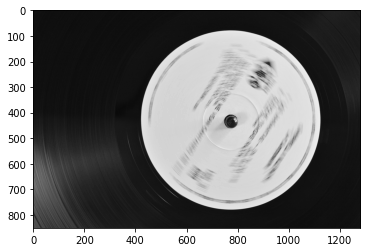

In [2]:
# 设置输入输出路径
import os
base_path = os.environ.get("BASE_PATH",'../data/')
data_path = os.path.join(base_path + "lab2/")
result_path = "result/"
os.makedirs(result_path, exist_ok=True)

# 读取磁盘图像
img = cv2.imread("./data/recording.jpg")

# 将磁盘图像转换为灰度
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 显示图片确认效果
plt.imshow(img, cmap='gray')
plt.show()

In [3]:
# 设置阈值和最大值
thresh = 150
maxValue = 255

# 执行图像二值化处理
th, dst = cv2.threshold(img, thresh, maxValue, cv2.THRESH_BINARY)

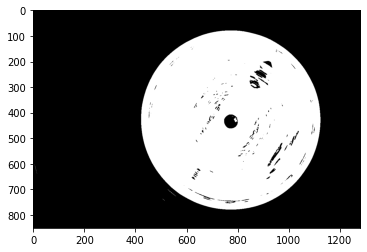

In [4]:
# 显示磁盘掩码图像确认效果
plt.imshow(dst, cmap='gray')
plt.show()

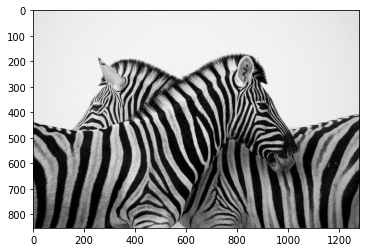

In [5]:
# 读取斑马图像
foreground = cv2.imread("./data/zebra.jpg")

# 将斑马图像转换为灰度
foreground = cv2.cvtColor(foreground, cv2.COLOR_BGR2GRAY)

# 显示图像确认效果
plt.imshow(foreground, cmap='gray')
plt.show()

In [6]:
# 检查斑马图像的形状
foreground.shape

(853, 1280)

In [7]:
# 检查磁盘图像的形状
dst.shape

(851, 1280)

In [8]:
# 调整为高度800像素和宽度1280像素，插值法使用线性插值
dst = cv2.resize(dst, (1280,800), interpolation = cv2.INTER_LINEAR)
foreground = cv2.resize(foreground, (1280,800), 
                        interpolation = cv2.INTER_LINEAR)

In [9]:
# 再次检查斑马图像的形状
foreground.shape

(800, 1280)

In [10]:
# 再次检查磁盘图像的形状
dst.shape

(800, 1280)

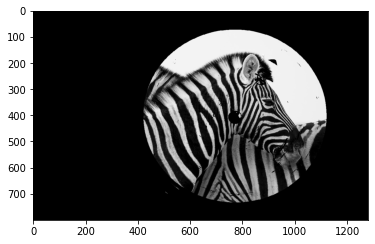

In [11]:
# 仅在磁盘像素为白色的位置保留斑马灰度图的像素。其他像素应替换为黑色，即0
result = np.where(dst, foreground, 0)

# 显示图像确认效果
plt.imshow(result, cmap='gray')
plt.show()